# Exercise 3

#### https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_gabor.html

In [6]:
# Done by Munther Odeh and Timo Marks
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from skimage.color import rgb2gray
from skimage.filters import gabor_kernel

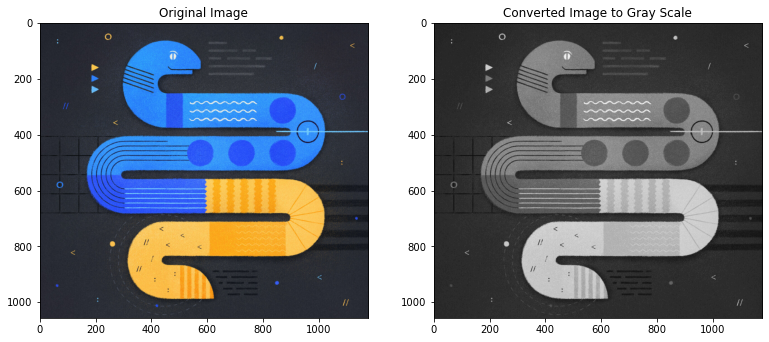

In [7]:
fig = plt.figure(figsize=(20, 20))
filename="python-hero.jpg"
img = plt.imread("Images/"+filename)
gray_img = rgb2gray(img)

fig1 = fig.add_subplot(1,3,1)
fig1.imshow(img)
fig1.title.set_text('Original Image')

fig2 = fig.add_subplot(1,3,2)
fig2.imshow(gray_img, cmap="gray")
fig2.title.set_text('Converted Image to Gray Scale')

In [ ]:
# Function for converting image to gray scale -> fft of gray image -> Plot 
def fft_of_image(filename):
    fig = plt.figure(figsize=(20, 20))
    img = plt.imread("Images/"+filename)
    gray_img = rgb2gray(img)
    fig1 = fig.add_subplot(1,3,1)
    fig1.imshow(img)
    fig1.title.set_text('Original Image')

    fig2 = fig.add_subplot(1,3,2)
    fig2.imshow(gray_img, cmap="gray")
    fig2.title.set_text('Converted Image to Gray Scale')

    # Fouriertransformation
    gray_img_fft = np.fft.fftshift(np.fft.fft2(gray_img))
    fig3 = fig.add_subplot(1,3,3)
    fig3.imshow(np.log(abs(gray_img_fft)), cmap="gray")
    fig3.title.set_text('FFT of Gray Image')